# Lorenz Attractor

links:

- [洛伦兹吸引子](https://zhuanlan.zhihu.com/p/32204557)

洛伦兹方程是大气流体动力学模型的一个简化的常微分方程组：

$$
\begin{cases}
\frac{\mathrm{d}x}{\mathrm{d}t} = -\sigma x + \sigma y \\
\frac{\mathrm{d}y}{\mathrm{d}t} = rx - y - xz \\
\frac{\mathrm{d}z}{\mathrm{d}t} = -bz + xy
\end{cases}
$$

其中，$x$ 为大气流体运动的强度，$y$ 和 $z$ 为水平和垂直方向的温度变化，$\sigma$ 为普兰特数，$r$ 为规范化的瑞利数，$b$ 和几何形状相关。


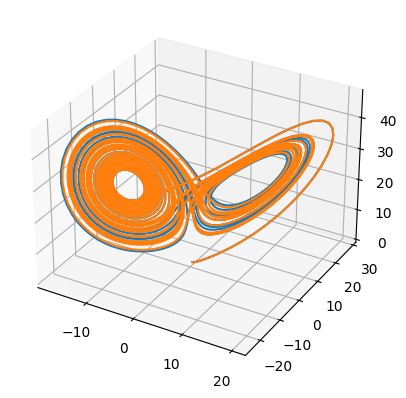

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mayavi import mlab


def lorenz(w, t, p, r, b):
    # 给出位置矢量w，和三个参数p, r, b计算出
    # dx/dt, dy/dt, dz/dt的值
    x, y, z = w
    # x, y, z = w.tolist()
    # 直接与lorenz的计算公式对应
    return np.array([p*(y-x), x*(r-z)-y, x*y-b*z])


t = np.arange(0, 30, 0.01)  # 创建时间点
# 调用ode对lorenz进行求解, 用两个不同的初始值
track1 = odeint(lorenz, (0.0, 1.00, 0.0), t, args=(10.0, 28.0, 3.0))
track2 = odeint(lorenz, (0.0, 1.01, 0.0), t, args=(10.0, 28.0, 3.0))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(track1[:, 0], track1[:, 1], track1[:, 2])
ax.plot(track2[:, 0], track2[:, 1], track2[:, 2])
plt.show()


In [7]:
t = np.arange(0, 30, 0.01)

# ode solver, two diffenent initial values
track1 = odeint(lorenz, (0.0, 1.00, 0.0), t, args=(10.0, 28.0, 3.0))
track2 = odeint(lorenz, (0.0, 1.01, 0.0), t, args=(10.0, 28.0, 3.0))


# mayavi 3D plot
mlab.figure(bgcolor=(1, 1, 1), size=(800, 600))
mlab.plot3d(track1[:, 0], track1[:, 1], track1[:, 2], color=(1, 0, 0), tube_radius=0.1)
mlab.plot3d(track2[:, 0], track2[:, 1], track2[:, 2], color=(0, 0, 1), tube_radius=0.1)
mlab.show()
